In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadroshaanriaz/students-performance-dataset-cleaned")

print("Path to dataset files:", path)

/home/gapostolides/jumping_virtual_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 9.94k/9.94k [00:00<00:00, 1.67MB/s]

Extracting files...
Path to dataset files: /home/gapostolides/.cache/kagglehub/datasets/muhammadroshaanriaz/students-performance-dataset-cleaned/versions/1


In [6]:
import os
print(np.__version__)
os.listdir(path)
data = pd.read_csv(path + "/Cleaned_Students_Performance.csv")

1.23.4


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.2+ KB


In [12]:
data.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


# Check for missing values

In [14]:
nans_count = data.isnull().sum()
print(nans_count)

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
average_score                  0
dtype: int64


No need for data impetement as there are no missing values.

# Check for categorial data

* **Features (x)**

   * **Gender:** Useful for analyzing performance differences between male and female students.

   * **Race/Ethnicity:** Allows analysis of academic performance trends across different racial or ethnic groups.

   * **Parental Level of Education:** Indicates the educational background of the student's family.

   * **Lunch:** Shows whether students receive a free or reduced lunch, which is often a socioeconomic indicator.

   * **Test Preparation Course:** This tells whether students completed a test prep course, which could impact their performance.

* **Variables of Interest (y)**

   * **Math Score:** Provides a measure of each student’s performance in math, used to calculate averages or trends across various demographics.

   * **Reading Score:** Measures performance in reading, allowing for insights into literacy and comprehension levels among students.

   * **Writing Score:** Evaluates students' writing skills, which can be analyzed to assess overall literacy and expression.
   
   * **Total Score:** Cumulative Score at Reading, Maths and Writing

# Exploratory Data Analysis (EDA)

In [34]:
data.describe()


,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,0.645000,0.358000,66.08900,69.169000,68.054000,203.312000,67.770667
std,0.499926,0.478753,0.479652,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,27.000000,9.000000
25%,0.000000,0.000000,0.000000,57.00000,59.000000,57.750000,175.000000,58.333333
50%,0.000000,1.000000,0.000000,66.00000,70.000000,69.000000,205.000000,68.333333
75%,1.000000,1.000000,1.000000,77.00000,79.000000,79.000000,233.000000,77.666667
max,1.000000,1.000000,1.000000,100.00000,100.000000,100.000000,300.000000,100.000000


In [ ]:
test_list = ["math_score","reading_score","writing_score"]
# Creating an average score column
data["average_score"] = data[test_list].mean(axis=1)
test_list.append("average_score")

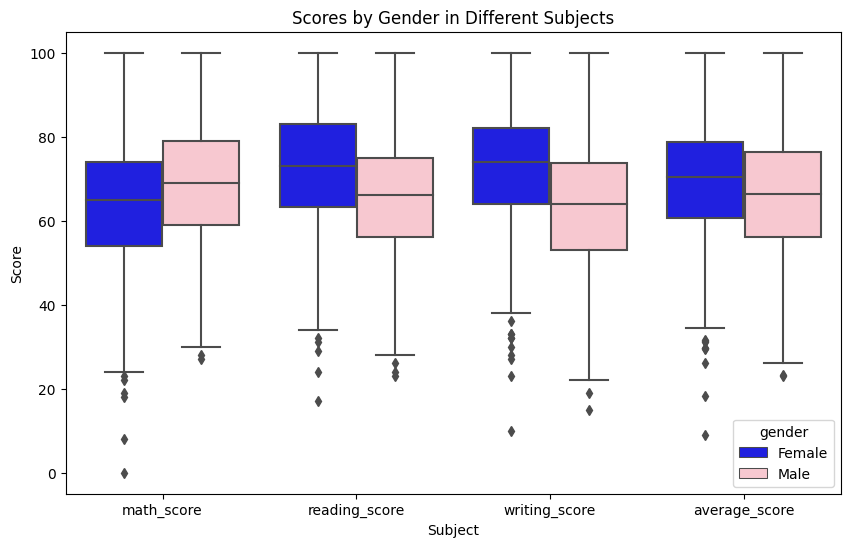

In [133]:
# Convert the data into long format
genderwise_scores = pd.melt(data, id_vars=["gender"], 
                    value_vars=test_list,
                    var_name="Subject", value_name="Score")

# Replace gender values with labels
genderwise_scores["gender"] = genderwise_scores["gender"].map({1: "Male", 0: "Female"})

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Subject", y="Score", hue="gender", data=genderwise_scores, palette=["blue", "pink"])

# Adding titles and labels
plt.title("Scores by Gender in Different Subjects")
plt.xlabel("Subject")
plt.ylabel("Score")

# Display the plot
plt.show()


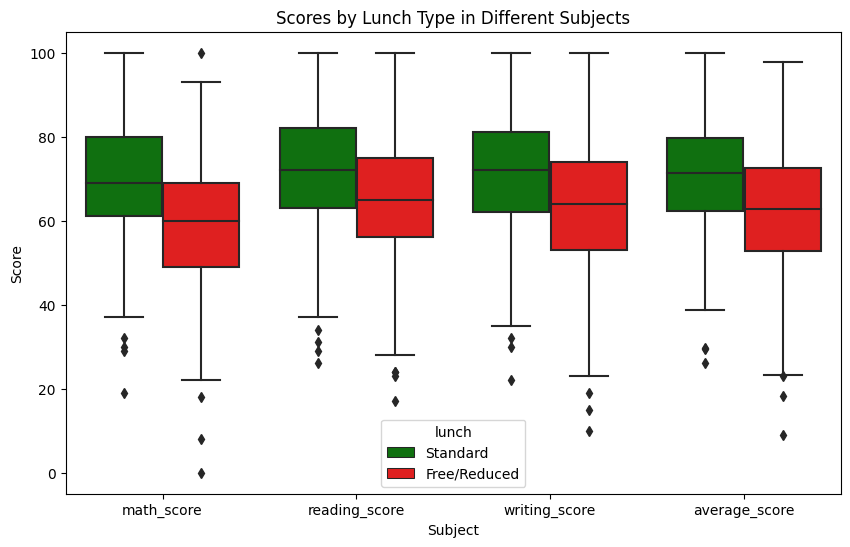

In [134]:
lunchwise_scores = pd.melt(data, id_vars=["lunch"], 
                            value_vars=test_list,
                            var_name="Subject", value_name="Score")

lunchwise_scores["lunch"] = lunchwise_scores["lunch"].map({1: "Standard", 0: "Free/Reduced"})
plt.figure(figsize=(10, 6))
sns.boxplot(x="Subject", y="Score", hue="lunch", data=lunchwise_scores, palette=["green", "red"])
plt.title("Scores by Lunch Type in Different Subjects")
plt.xlabel("Subject")
plt.ylabel("Score")
plt.show()



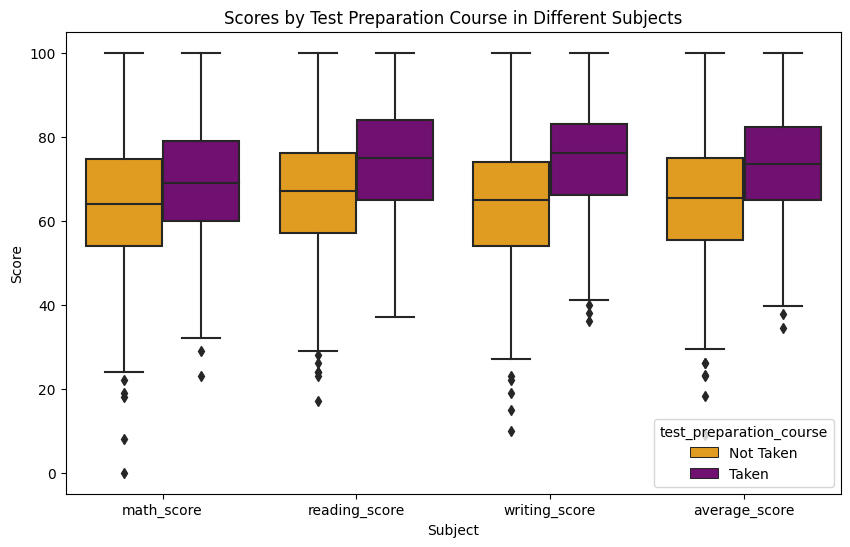

In [135]:
testprepwise_scores = pd.melt(data, id_vars=["test_preparation_course"],
                              value_vars=test_list,var_name="Subject",value_name="Score")

testprepwise_scores["test_preparation_course"] = testprepwise_scores["test_preparation_course"].map({1:"Taken",0:"Not Taken"})
plt.figure(figsize=(10,6))
sns.boxplot(x="Subject",y="Score",hue="test_preparation_course",data=testprepwise_scores,palette=["orange","purple"])
plt.title("Scores by Test Preparation Course in Different Subjects")
plt.xlabel("Subject")
plt.ylabel("Score")
plt.show()

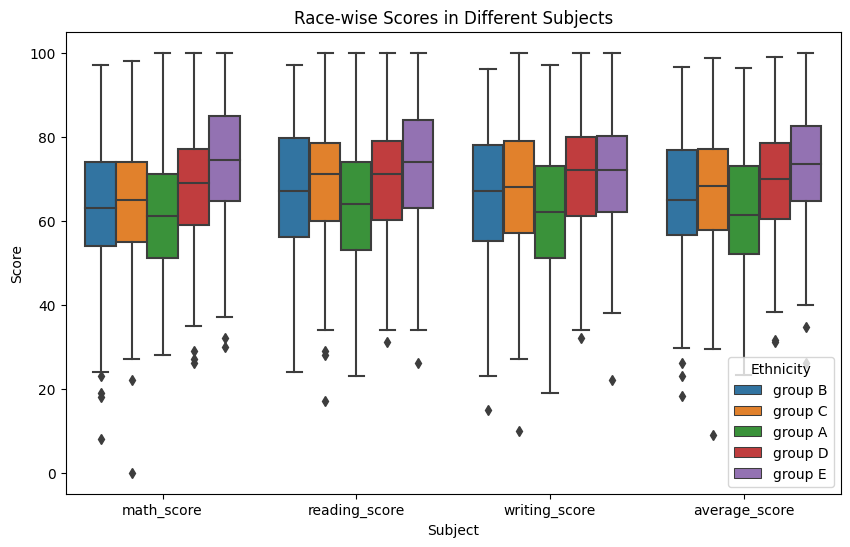

In [136]:
# Get sorted unique labels from the race_ethnicity column
race_labels = sorted(data["race_ethnicity"].unique().tolist())

racewise_scores = pd.melt(data, id_vars=["race_ethnicity"], 
                          value_vars=test_list, 
                          var_name="Subject", value_name="Score")

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Subject", y="Score", hue="race_ethnicity", data=racewise_scores)
plt.title("Race-wise Scores in Different Subjects")
plt.xlabel("Subject")
plt.ylabel("Score")
plt.legend(title="Ethnicity")
plt.show()

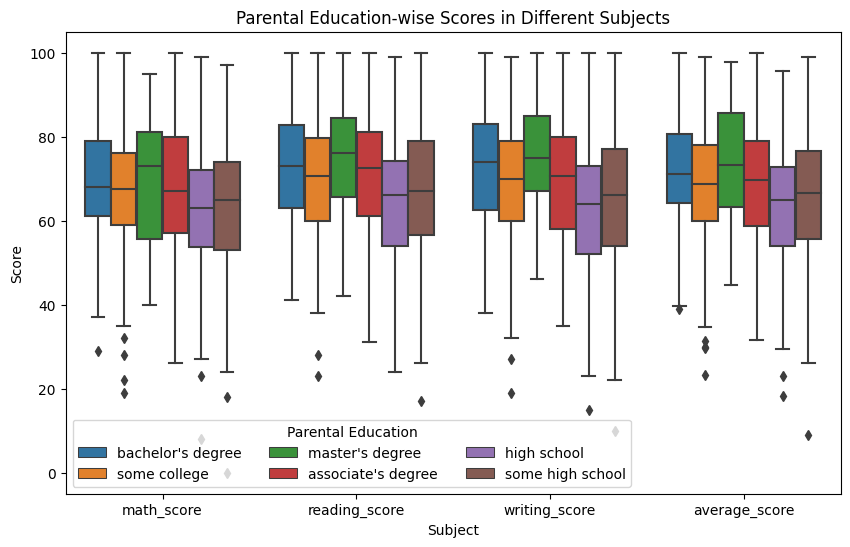

In [ ]:
parent_edu_labels = data["parental_level_of_education"].unique().tolist()
parent_edu_scores = pd.melt(data,id_vars=["parental_level_of_education"],value_vars=test_list,var_name="Subject",value_name="Score")

plt.figure(figsize=(10,6))
sns.boxplot(x="Subject",y="Score",hue="parental_level_of_education",data=parent_edu_scores)
plt.title("Parental Education-wise Scores in Different Subjects")
plt.xlabel("Subject")
plt.ylabel("Score")
plt.legend(title="Parental Education",loc="lower left",ncol=3)
# plt.ylim(-30,120)
plt.show()



# Correlation Analysis
- Examining correlation between average score and the different features

/tmp/ipykernel_21706/2503505236.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = corelation_data.corr()


<Figure size 1000x600 with 0 Axes>

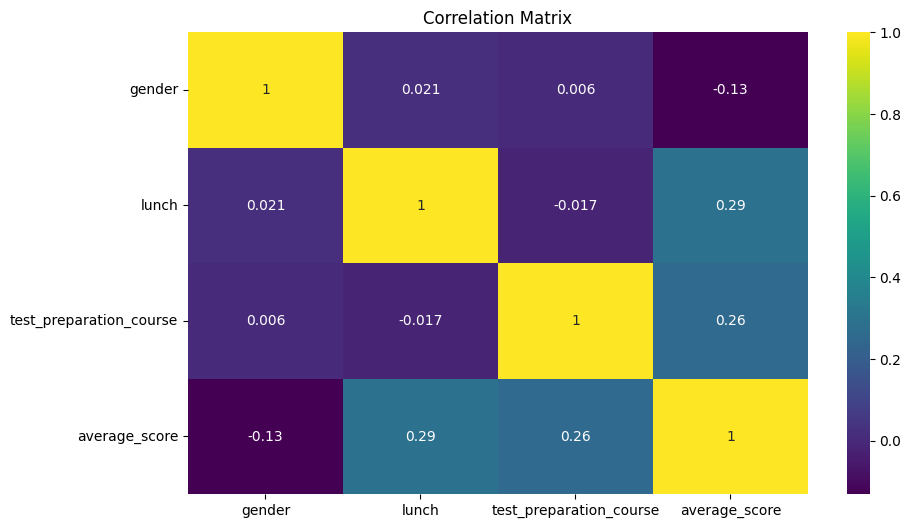

In [144]:
# Create a correlation matrix
# Does not make sense to calculate correlation between categorical variables
corelation_data = data.drop(columns=["reading_score","writing_score","math_score","total_score"])
correlation = corelation_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True,cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

- Indicates high correlation between the type of lunch and the average score.
- Indicates high correlation between test preparation score and the average score.
- Two most significant features are: **lunch type** and **test_preparation_course**.

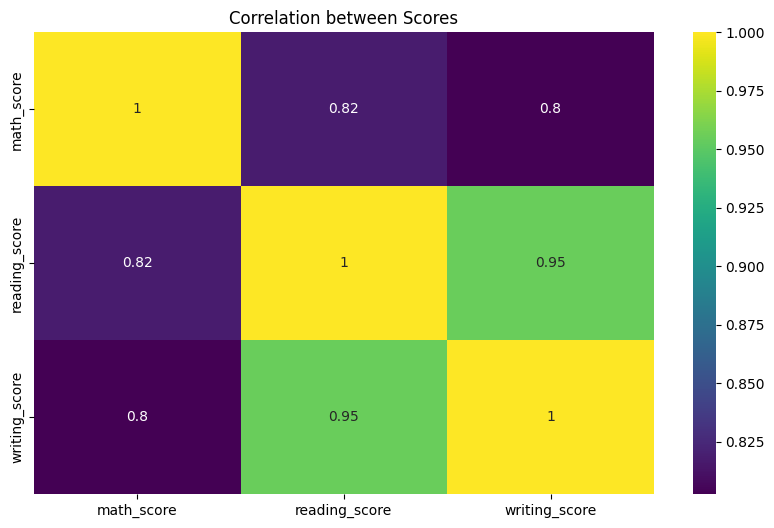

In [204]:
# Correlation between scores
score_correlation = data[test_list].drop(columns="average_score").corr()
plt.figure(figsize=(10,6))
sns.heatmap(score_correlation,annot=True,cmap="viridis")
plt.title("Correlation between Scores")
plt.show()

* Scores are strongly correlated with each other meaning if one student has a good score at **reading** then its likely to have also a good score at **writing**.
* Comparatevely there is less corelation between **math score** and **reading** and **writing** scores.

/tmp/ipykernel_21706/1345922110.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_data = data.drop(columns=checked_test).corr()
/tmp/ipykernel_21706/1345922110.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_data = data.drop(columns=checked_test).corr()
/tmp/ipykernel_21706/1345922110.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_data = data.drop(columns=checked_test).corr()


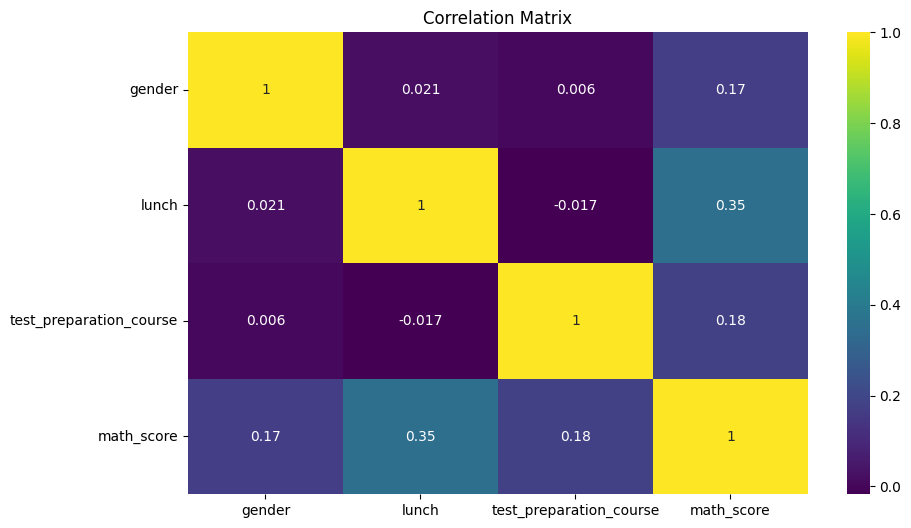

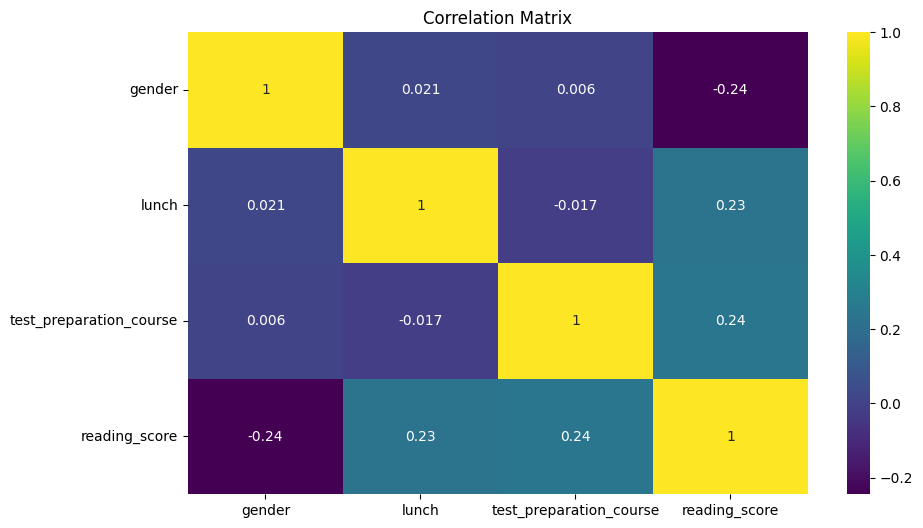

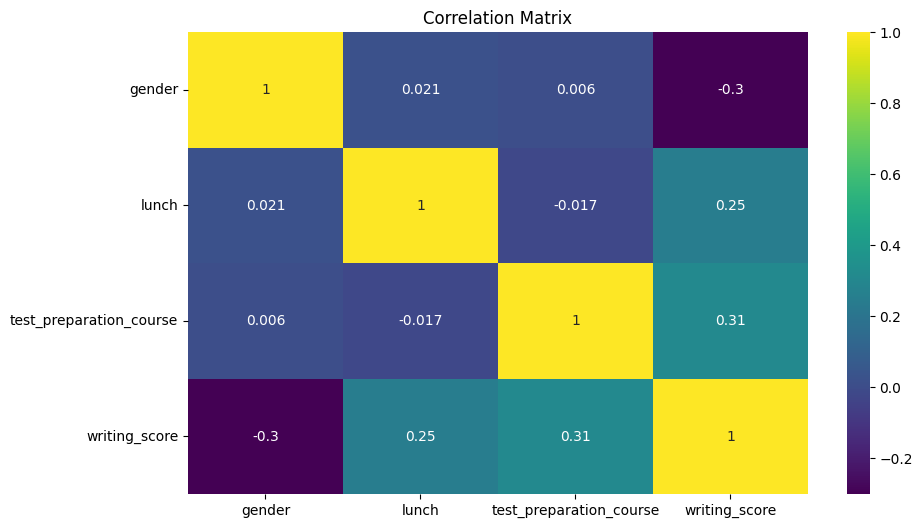

In [247]:
#Checking the correlation between features and individual scores
# Create a correlation matrix
test_list = ["math_score", "reading_score", "writing_score"]
def individual_score_correlation(data, checked_test):
    correlation_data = data.drop(columns=checked_test).corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_data, annot=True, cmap="viridis")
    plt.title("Correlation Matrix")


for subject in test_list:
    tests = ["math_score", "reading_score", "writing_score", "average_score","total_score"]
    tests.remove(subject)
    individual_score_correlation(data, tests)
plt.show()

* There is a strong correlation between **lunch** and **scores** in general.
* Strongest correlation is shown between **lunch** and **math scores**.

## T-test

- Employeed for binary features only. For multiclass features we will use ANOVA.
- Employeeing t-test to quantify difference between gender in average score.

In [214]:
from scipy.stats import ttest_ind

print("*"*65)
print(" "*23+"T-Tests for Gender")
print("*"*65,end="\n")

for subject in test_list:
    male_scores = genderwise_scores[genderwise_scores["gender"]=="Male"]
    male_math_scores = male_scores[male_scores["Subject"]==subject]["Score"]

    female_scores = genderwise_scores[genderwise_scores["gender"]=="Female"]
    female_math_scores = female_scores[female_scores["Subject"]==subject]["Score"]

    # Perform t-test
    t_statistics, p_values = ttest_ind(male_math_scores,female_math_scores)
    print(f"Significance Difference between Male and Female for {subject}")
    print("="*65)
    print("T statistics:", t_statistics)
    print("P values:", p_values)

    #Using a significance level of 0.05 ==> Confidence level of 95%
    if p_values < 0.05:
        print("Null hypothesis rejected. There is a significant difference\n")
        
print("\n"+"*"*75)
print(" "*25+"T-Tests for Lunch Type")
print("*"*75, end="\n"*2)

for subject in test_list:
    standard_scores = lunchwise_scores[lunchwise_scores["lunch"]=="Standard"]
    standard_math_scores = standard_scores[standard_scores["Subject"]==subject]["Score"]

    free_scores = lunchwise_scores[lunchwise_scores["lunch"]=="Free/Reduced"]
    free_math_scores = free_scores[free_scores["Subject"]==subject]["Score"]

    # Perform t-test
    t_statistics, p_values = ttest_ind(standard_math_scores,free_math_scores)
    print(f"Significance Difference between Standard and Free/Reduced for {subject}")
    print("="*75)
    print("T statistics:", t_statistics)
    print("P values:", p_values)

    #Using a significance level of 0.05 ==> Confidence level of 95%
    if p_values < 0.05:
        print("Null hypothesis rejected. There is a significant difference\n")

*****************************************************************
                       T-Tests for Gender
*****************************************************************
Significance Difference between Male and Female for math_score
T statistics: 5.383245869828983
P values: 9.120185549328822e-08
Null hypothesis rejected. There is a significant difference

Significance Difference between Male and Female for reading_score
T statistics: -7.959308005187657
P values: 4.680538743933289e-15
Null hypothesis rejected. There is a significant difference

Significance Difference between Male and Female for writing_score
T statistics: -9.979557910004507
P values: 2.019877706867934e-22
Null hypothesis rejected. There is a significant difference

Significance Difference between Male and Female for average_score
T statistics: -4.169913529142
P values: 3.311973638243664e-05
Null hypothesis rejected. There is a significant difference


****************************************************************

## ANOVA Test

* Performing an anova test for significant difference in average score for:
   * Different parental education level
   * Different ethnicities 

In [215]:
from scipy.stats import f_oneway

# Performing one-way ANOVA for test parental education level
print("*"*75)
print(" "*15+"One-Way ANOVA for Parental Education Level")
print("*"*75, end="\n"*2)

for subject in test_list:
    edu_scores = parent_edu_scores[parent_edu_scores["Subject"]==subject]
    edu_scores = [edu_scores[edu_scores["parental_level_of_education"]==edu]["Score"] for edu in parent_edu_labels]

    # Perform one-way ANOVA
    f_statistics, p_values = f_oneway(*edu_scores)
    print(f"Significance Difference between Parental Education Levels for {subject}")
    print("="*75)
    print("F statistics:", f_statistics)
    print("P values:", p_values)

    #Using a significance level of 0.05 ==> Confidence level of 95%
    if p_values < 0.05:
        print("Null hypothesis rejected. There is a significant difference\n")
        

***************************************************************************
               One-Way ANOVA for Parental Education Level
***************************************************************************

Significance Difference between Parental Education Levels for math_score
F statistics: 6.521582600453217
P values: 5.592272384107223e-06
Null hypothesis rejected. There is a significant difference

Significance Difference between Parental Education Levels for reading_score
F statistics: 9.289400382379963
P values: 1.16824570457051e-08
Null hypothesis rejected. There is a significant difference

Significance Difference between Parental Education Levels for writing_score
F statistics: 14.442416127574992
P values: 1.1202799969771148e-13
Null hypothesis rejected. There is a significant difference

Significance Difference between Parental Education Levels for average_score
F statistics: 10.75314696233657
P values: 4.3810464809431664e-10
Null hypothesis rejected. There is a significan

In [212]:
# Performing one-way ANOVA for different ethnicities
print("*"*75)
print(" "*15+"One-Way ANOVA for Ethnicities")
print("*"*75, end="\n"*2)

for subject in test_list:
    ethnicity_scores = racewise_scores[racewise_scores["Subject"]==subject]
    
    ethnicity_scores = [ethnicity_scores[ethnicity_scores["race_ethnicity"]==race]["Score"] for race in race_labels]
    
    # Perform one-way ANOVA
    f_statistics, p_values = f_oneway(*ethnicity_scores)
    print(f"Significance Difference between Ethnicities for {subject}")
    print("="*75)
    print("F statistics:", f_statistics)
    print("P values:", p_values)
    
    #Using a significance level of 0.05 ==> Confidence level of 95%
    if p_values < 0.05:
        print("Null hypothesis rejected. There is a significant difference\n")  

***************************************************************************
               One-Way ANOVA for Ethnicities
***************************************************************************

Significance Difference between Ethnicities for math_score
F statistics: 14.593885166332635
P values: 1.3732194030370688e-11
Null hypothesis rejected. There is a significant difference

Significance Difference between Ethnicities for reading_score
F statistics: 5.621659307419643
P values: 0.0001780089103235947
Null hypothesis rejected. There is a significant difference

Significance Difference between Ethnicities for writing_score
F statistics: 7.162415174347504
P values: 1.0979189070067382e-05
Null hypothesis rejected. There is a significant difference

Significance Difference between Ethnicities for average_score
F statistics: 9.09605231339089
P values: 3.2258693161040875e-07
Null hypothesis rejected. There is a significant difference

